In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams["font.family"] = "Helvetica"

rc('text', usetex=False)

In [105]:
# c_range.reverse()
c_range

[512.0, 256.0, 128.0, 64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0]

In [106]:
labels

[10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

In [107]:
mses = {}
for C in c_range:
    mses.update(pickle.load(open(f'data/C={C}_wine_mses.pkl', 'rb')))

In [108]:
mses.keys()

dict_keys([512.0, 256.0, 128.0, 64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0])

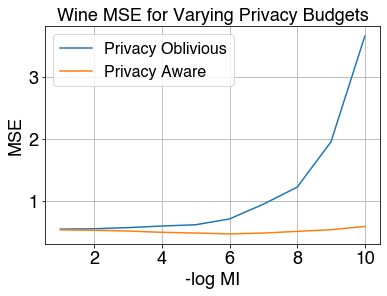

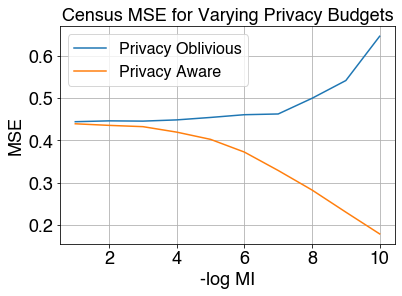

In [115]:
for data in ['Wine', 'Census']:
    mi_range = [2**(x) for x in range(-10, 0)]

    labels = [-np.log2(x) for x in mi_range]

    c_range = [1/(2*mi) for mi in mi_range]
    mses = {}
    for C in c_range:
        mses.update(pickle.load(open(f'data/C={C}_{data.lower()}_mses.pkl', 'rb')))
    xs = []
    priv_aware = []
    priv_obl = []
    for i, c in enumerate(c_range):
        xs.append(labels[i])
        priv_obl.append(np.average(mses[c][0]))
        priv_aware.append(np.average(mses[c][1]))
    plt.plot(xs, priv_obl, label=f'Privacy Oblivious')
    plt.plot(xs, priv_aware, label='Privacy Aware')
    plt.grid(True)
    plt.tick_params(axis='both', labelsize=18)
    plt.xlabel("-log MI", fontsize=18)
    plt.ylabel("MSE", fontsize=18)
    plt.legend(fontsize=16)
    plt.title(f"{data} MSE for Varying Privacy Budgets", fontsize=18)
    plt.show()